# Generate new tiles

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/opssat/opssat_challenge

/content/drive/MyDrive/opssat/opssat_challenge


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

## Load sample image

In [5]:
read_path = '../images/'

In [6]:
image = Image.open(read_path + '001.png')
image = np.array(image)
image.shape

(1944, 2048, 3)

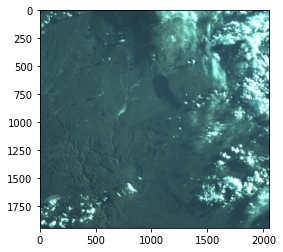

In [7]:
plt.imshow(image)

## Cut 10 random tiles per raw image

In [8]:
files = sorted(os.listdir(read_path))
files

['001.png',
 '002.png',
 '003.png',
 '004.png',
 '005.png',
 '006.png',
 '007.png',
 '008.png',
 '009.png',
 '010.png',
 '011.png',
 '012.png',
 '013.png',
 '014.png',
 '015.png',
 '016.png',
 '017.png',
 '018.png',
 '019.png',
 '020.png',
 '021.png',
 '022.png',
 '023.png',
 '024.png',
 '025.png',
 '026.png']

In [9]:
!mkdir -p /content/drive/MyDrive/opssat/new_tiles

In [10]:
write_path = '../new_tiles/'

In [11]:
seed = 2

In [12]:
%%time

for file in files:

  print('Processing {}...'.format(file))

  raw_image = Image.open(read_path + file)
  raw_image = np.array(raw_image)

  for i in range(1, 11):
    tile = tf.image.stateless_random_crop(raw_image, (200, 200, 3), (seed**(i+1), seed**(i+2))).numpy()
    tile = Image.fromarray(tile).convert('RGB')
    #tile.save(write_path + '{}_{}.png'.format(file.split('.')[0], i))

Processing 001.png...
Processing 002.png...
Processing 003.png...
Processing 004.png...
Processing 005.png...
Processing 006.png...
Processing 007.png...
Processing 008.png...
Processing 009.png...
Processing 010.png...
Processing 011.png...
Processing 012.png...
Processing 013.png...
Processing 014.png...
Processing 015.png...
Processing 016.png...
Processing 017.png...
Processing 018.png...
Processing 019.png...
Processing 020.png...
Processing 021.png...
Processing 022.png...
Processing 023.png...
Processing 024.png...
Processing 025.png...
Processing 026.png...
CPU times: user 6.69 s, sys: 234 ms, total: 6.92 s
Wall time: 10.9 s


## Cut additional agriculture tiles

In [13]:
def cut_tiles(class_name, file_name, tile_name, target_height, target_width, offset_height, offset_width):

  raw_image = Image.open(read_path + file_name)
  raw_image = np.array(raw_image)
  tile = tf.image.crop_to_bounding_box(raw_image, offset_height, offset_width, target_height, target_width).numpy()
  tile = Image.fromarray(tile).convert('RGB')
  tile.save((write_path + '{}_{}_ ' + class_name + '.png').format(file_name.split('.')[0], tile_name))

In [14]:
target_height = 200
target_width = 200

In [15]:
offset_height_width_pairs = [(900, 500),
                             (900, 350),
                             (800, 350),
                             (1250, 1650),
                             (1500, 1700),
                             (1700, 1800)]

In [16]:
i = 0
for pair in offset_height_width_pairs:
  i += 1
  cut_tiles('agriculture', '009.png', i, target_height, target_width, pair[0], pair[1])

## Cut additional river tiles

In [17]:
river_images = {'006.png': [(250, 250), (500, 250), (1730, 400)],
                '009.png': [(100, 1550), (100, 1400), (100, 1150)],
                '014.png': [(450, 1750), (1500, 1800), (1200, 1600)],
                '016.png': [(1500, 1800), (1550, 1600), (1730, 1300)],
                '018.png': [(1350, 250), (850, 500), (1150, 1350)]}

In [18]:
for image in river_images:
  i = 0
  for tile in range(0, len(river_images[image])):
    i += 1
    cut_tiles('river', image, i, target_height, target_width, river_images[image][tile][0], river_images[image][tile][1])